In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.cluster import KMeans
from scipy.stats import skew
import warnings
warnings.filterwarnings('ignore')

In [2]:
dataset = pd.read_csv('customers_dataset.csv')
dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


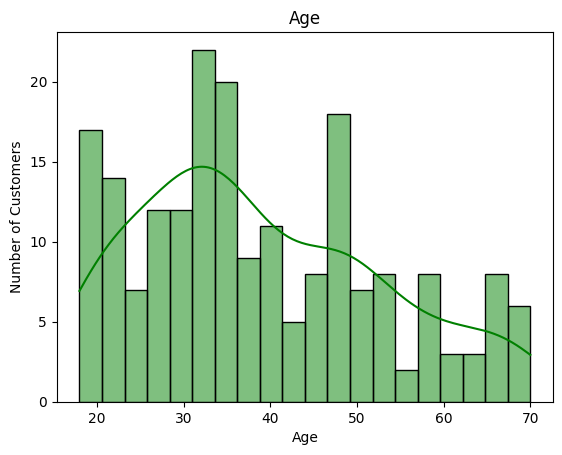

In [3]:
sns.histplot(dataset['Age'], bins=20, kde=True, color='green')
plt.title('Age')
plt.xlabel('Age')
plt.ylabel('Number of Customers')
plt.tight_layout
plt.show()

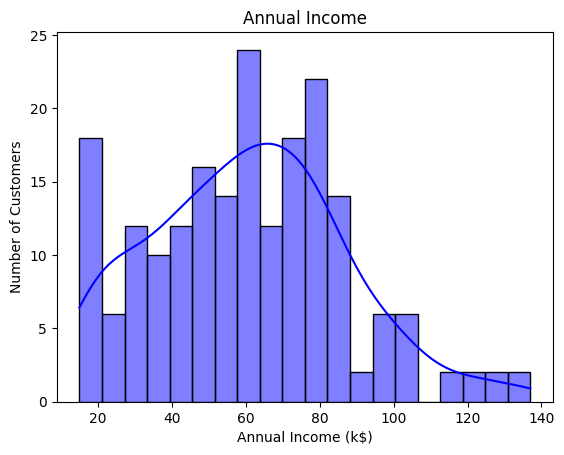

In [4]:
sns.histplot(dataset['Annual Income (k$)'], bins=20, kde=True, color='blue')
plt.title('Annual Income')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Number of Customers')
plt.tight_layout
plt.show()

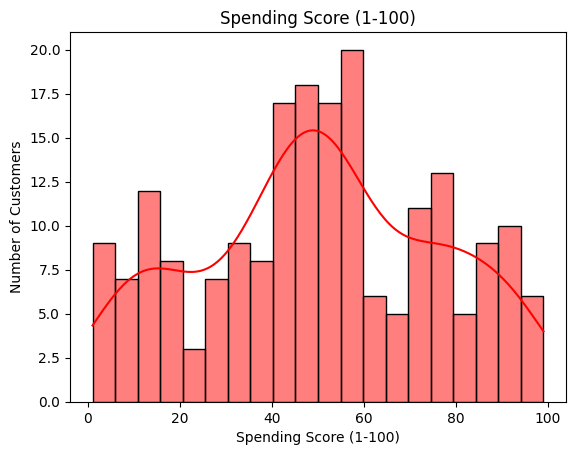

In [5]:
sns.histplot(dataset['Spending Score (1-100)'], bins=20, kde=True, color='red')
plt.title('Spending Score (1-100)')
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Number of Customers')
plt.tight_layout
plt.show()

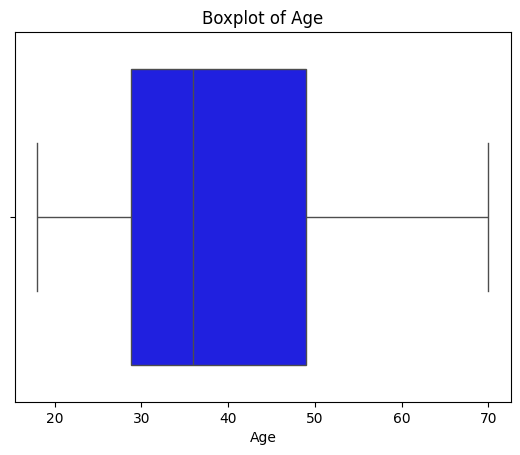

In [6]:
sns.boxplot(x=dataset['Age'], color = 'blue')
plt.title('Boxplot of Age')
plt.show()

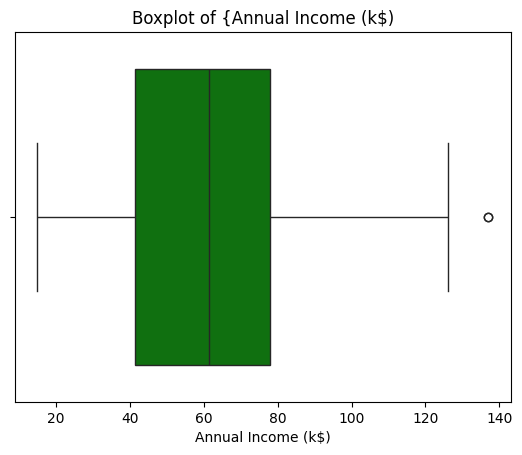

In [7]:
sns.boxplot(x=dataset['Annual Income (k$)'], color = 'green')
plt.title('Boxplot of {Annual Income (k$)')
plt.show()

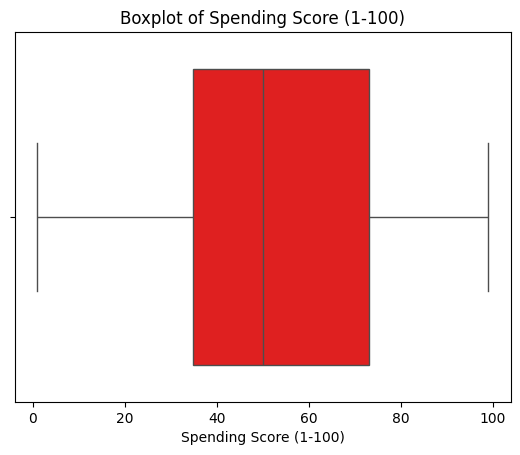

In [8]:
sns.boxplot(x=dataset['Spending Score (1-100)'], color = 'red')
plt.title('Boxplot of Spending Score (1-100)')
plt.show()

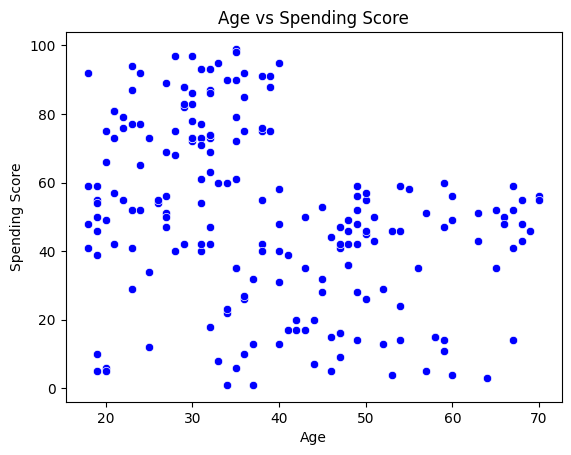

In [9]:
sns.scatterplot(x='Age', y='Spending Score (1-100)', data=dataset, color='blue')
plt.title('Age vs Spending Score')
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.show()

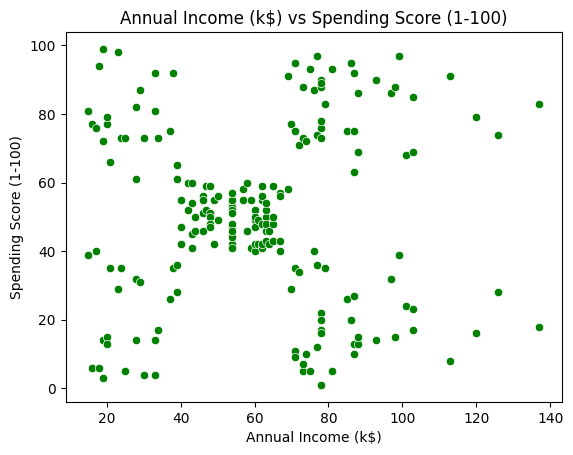

In [10]:
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=dataset, color = 'green')
plt.title('Annual Income (k$) vs Spending Score (1-100)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

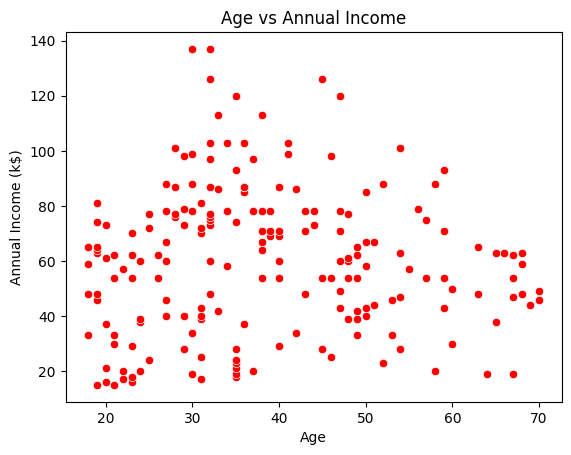

In [11]:
sns.scatterplot(x='Age', y='Annual Income (k$)', data=dataset, color='red')
plt.title('Age vs Annual Income')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.show()

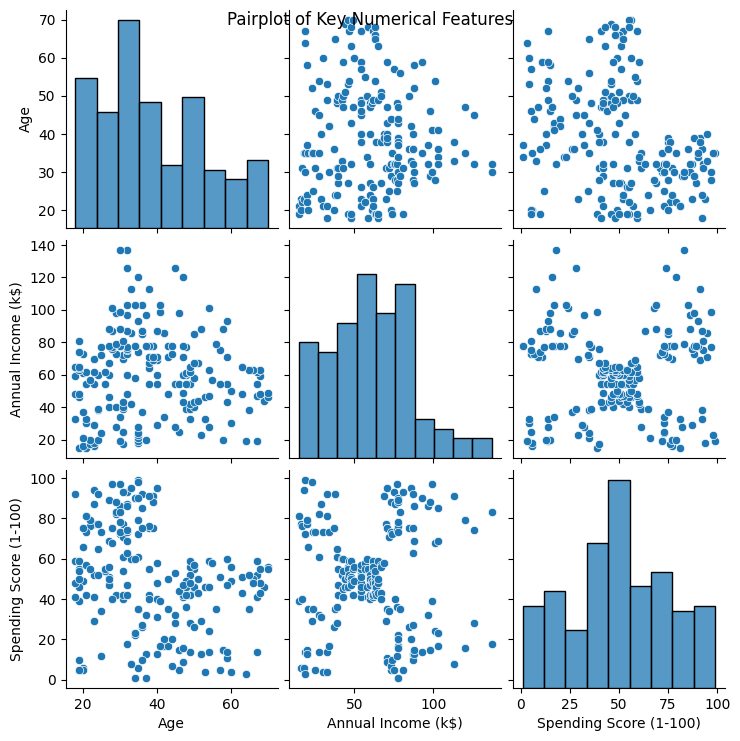

In [12]:
sns.pairplot(dataset[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
plt.suptitle('Pairplot of Key Numerical Features')
plt.show()

In [13]:
skew_values = dataset[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].skew()
skew_values

Age                       0.485569
Annual Income (k$)        0.321843
Spending Score (1-100)   -0.047220
dtype: float64

Here we can see that only age and annual income are slightly right skewed and spending score is approximately normal distribution.
So I will apply transformations only on age and annual income.

In [14]:
dataset['Age_log'] = np.log1p(dataset['Age'])
dataset['Annual_Income_log'] = np.log1p(dataset['Annual Income (k$)'])

print("Before transformation skew (Age):", dataset['Age'].skew())
print("After transformation skew (Age_log):", dataset['Age_log'].skew())

print("Before transformation skew (Annual Income):", dataset['Annual Income (k$)'].skew())
print("After transformation skew (Annual_Income_log)", dataset['Annual_Income_log'].skew())

Before transformation skew (Age): 0.48556885096681657
After transformation skew (Age_log): -0.0894906016890439
Before transformation skew (Annual Income): 0.3218425498619055
After transformation skew (Annual_Income_log) -0.7359971613306433


Applying log transform to annual income column changes its skewness to -0.7 which is more left skewed than its original skewness which is 0.32.
So Log transform is not much beneficial for annual income.

In [15]:
scaler_std = StandardScaler()

dataset[['Age_std', 'Income_std']] = scaler_std.fit_transform(dataset[['Age', 'Annual Income (k$)']])
print(dataset['Age'].skew())
print(dataset['Age_std'].skew())
print(dataset['Annual Income (k$)'].skew())
print(dataset['Income_std'].skew())

0.48556885096681657
0.4855688509668167
0.3218425498619055
0.3218425498619062


skewness is very much same after applying standard scaler.

In [16]:
scaler_minmax = MinMaxScaler()

dataset[['Age_minmax', 'Income_minmax']] = scaler_minmax.fit_transform(dataset[['Age', 'Annual Income (k$)']])
print(dataset['Age'].skew())
print(dataset['Age_minmax'].skew())
print(dataset['Annual Income (k$)'].skew())
print(dataset['Income_minmax'].skew())

0.48556885096681657
0.4855688509668167
0.3218425498619055
0.32184254986190536


skewness is very much same after applying minmax scaler.

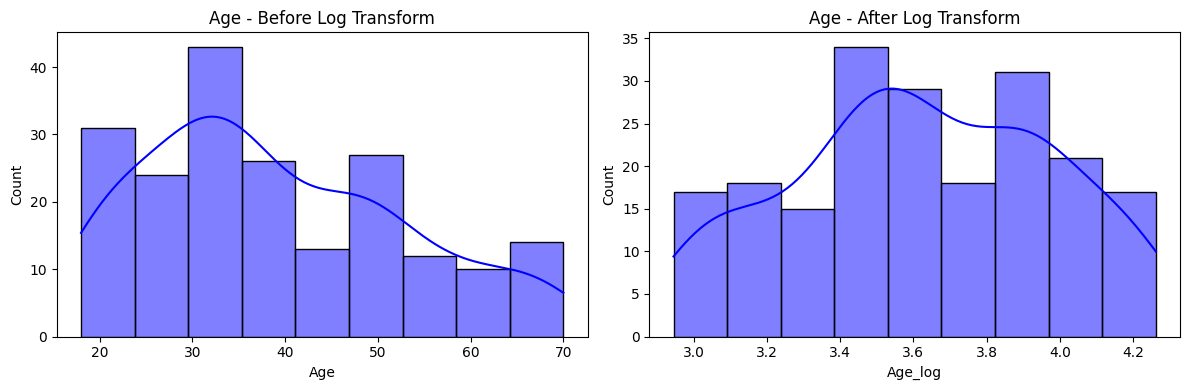

In [17]:
fig, [ax1, ax2] = plt.subplots(ncols=2, figsize=(12, 4))
sns.histplot(dataset['Age'], ax=ax1, kde=True, color='blue')
sns.histplot(dataset['Age_log'], ax=ax2, kde=True, color='blue')
ax1.set_title("Age - Before Log Transform")
ax2.set_title("Age - After Log Transform")
plt.tight_layout()
plt.show()

log transform improves skewness of Age as transformed histogram looks like normal distribution "belly curve"

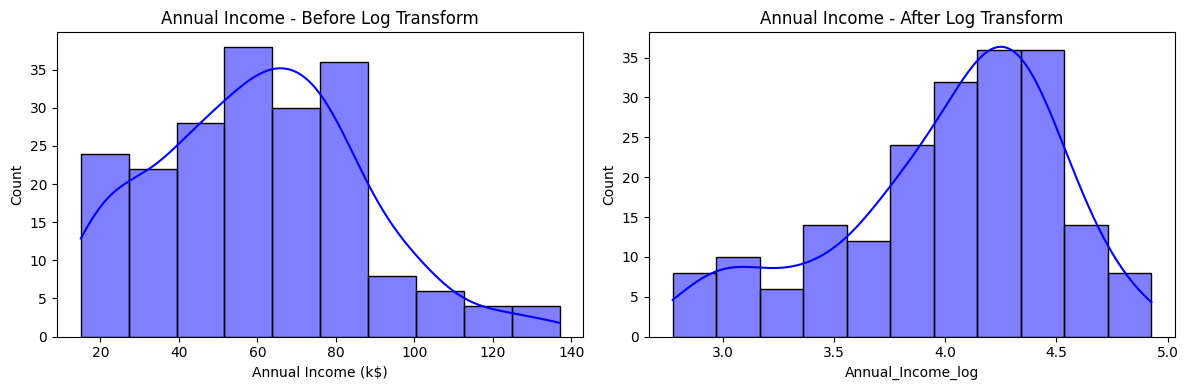

In [18]:
fig, [ax1, ax2] = plt.subplots(ncols=2, figsize=(12, 4))
sns.histplot(dataset['Annual Income (k$)'], ax=ax1, kde=True, color='blue')
sns.histplot(dataset['Annual_Income_log'], ax=ax2, kde=True, color='blue')
ax1.set_title("Annual Income - Before Log Transform")
ax2.set_title("Annual Income - After Log Transform")
plt.tight_layout()
plt.show()

It is seen that transformed histogram is left skewed with skewness -0.73 and original was right skewed with skewness 0.32.
So log transform is not useful.

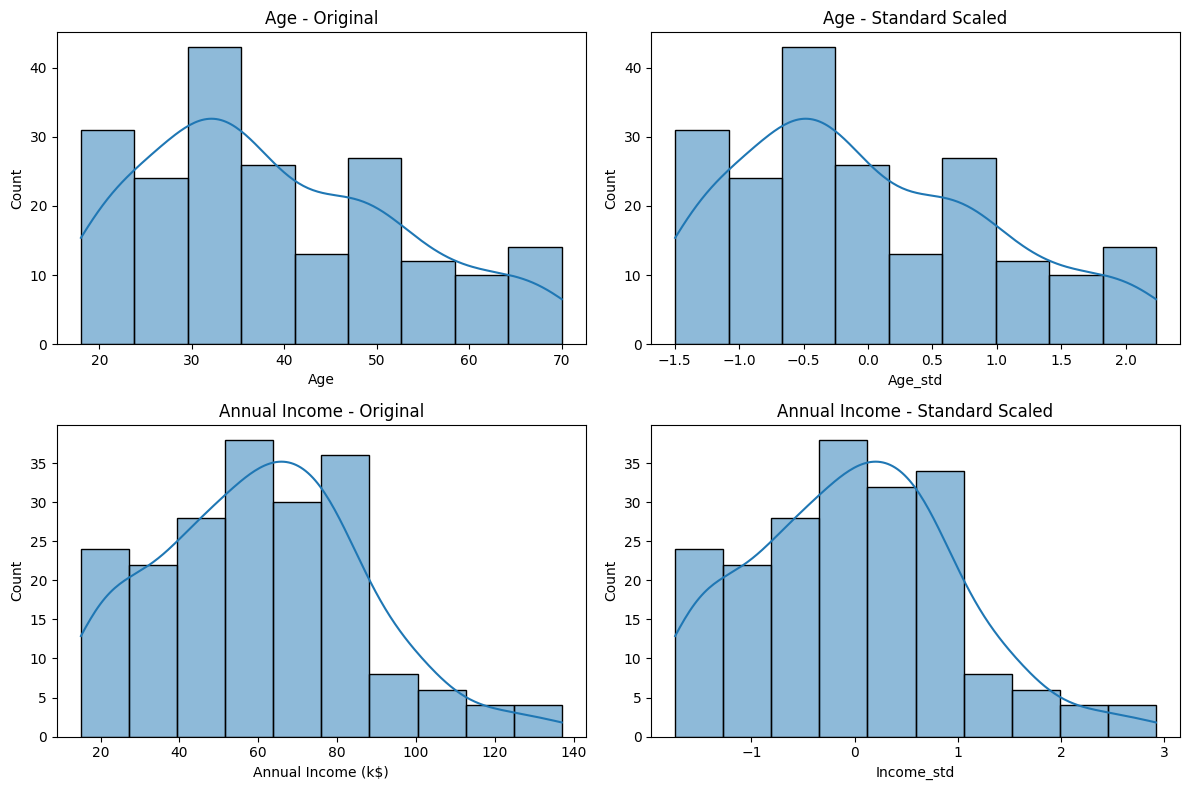

In [19]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.ravel()

sns.histplot(dataset['Age'], kde=True, ax=axes[0])
axes[0].set_title('Age - Original')

sns.histplot(dataset['Age_std'], kde=True, ax=axes[1])
axes[1].set_title('Age - Standard Scaled')

sns.histplot(dataset['Annual Income (k$)'], kde=True, ax=axes[2])
axes[2].set_title('Annual Income - Original')

sns.histplot(dataset['Income_std'], kde=True, ax=axes[3])
axes[3].set_title('Annual Income - Standard Scaled')

plt.tight_layout()
plt.show()

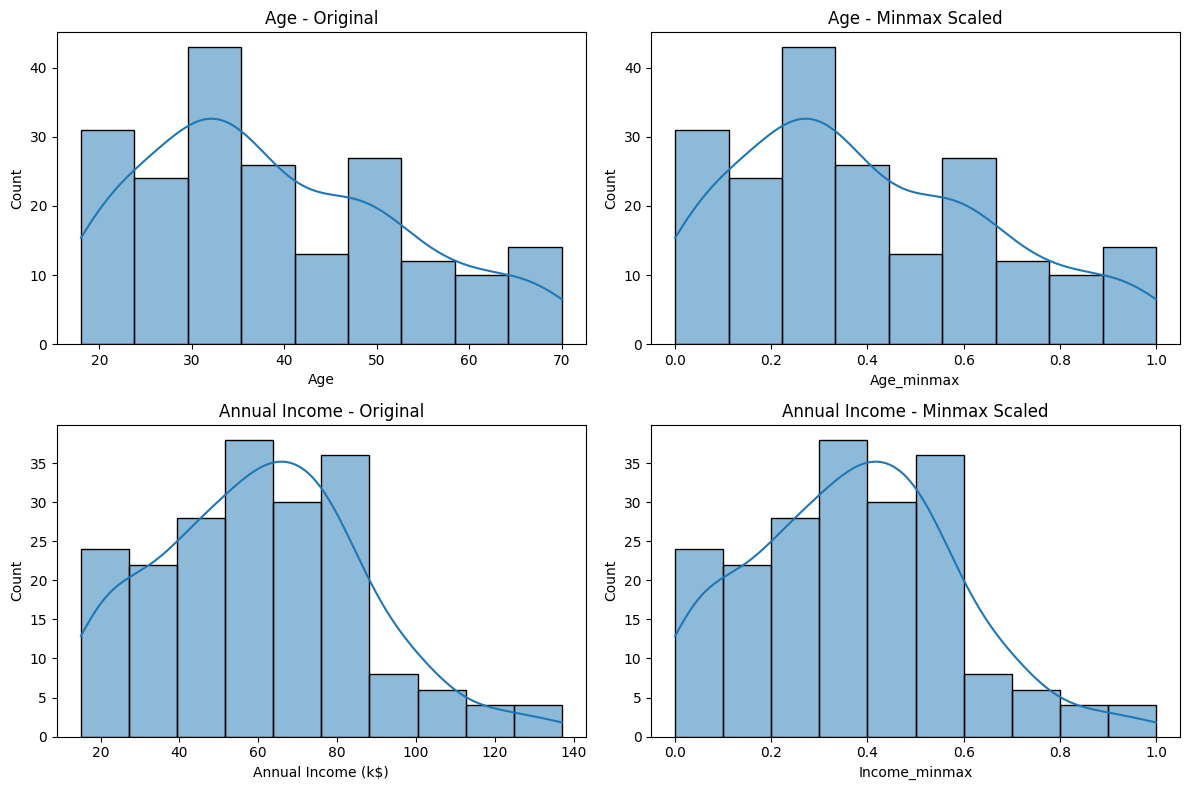

In [20]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.ravel()

sns.histplot(dataset['Age'], kde=True, ax=axes[0])
axes[0].set_title('Age - Original')

sns.histplot(dataset['Age_minmax'], kde=True, ax=axes[1])
axes[1].set_title('Age - Minmax Scaled')

sns.histplot(dataset['Annual Income (k$)'], kde=True, ax=axes[2])
axes[2].set_title('Annual Income - Original')

sns.histplot(dataset['Income_minmax'], kde=True, ax=axes[3])
axes[3].set_title('Annual Income - Minmax Scaled')

plt.tight_layout()
plt.show()

it is seen that scatter scaled and minmax scaled does not improve skewness as original histogram and transfomed histogram looks similar.(long tail at right end)

In [21]:
# Mean and Standard Deviation
print(dataset['Age'].mean())
print(dataset['Annual Income (k$)'].mean())
print(dataset['Age_log'].mean())
print(dataset['Annual_Income_log'].mean())
print(dataset['Age_std'].mean())
print(dataset['Income_std'].mean())
print(dataset['Age_minmax'].mean())
print(dataset['Income_minmax'].mean())

print(dataset['Age'].std())
print(dataset['Annual Income (k$)'].std())
print(dataset['Age_log'].std())
print(dataset['Annual_Income_log'].std())
print(dataset['Age_std'].std())
print(dataset['Income_std'].std())
print(dataset['Age_minmax'].std())
print(dataset['Income_minmax'].std())

38.85
60.56
3.623080371378513
4.012388962976807
-1.021405182655144e-16
-2.1316282072803005e-16
0.40096153846153854
0.3734426229508197
13.96900733155888
26.264721165271244
0.35662930335922743
0.4951010750719502
1.002509414234171
1.002509414234171
0.2686347563761323
0.21528459971533806


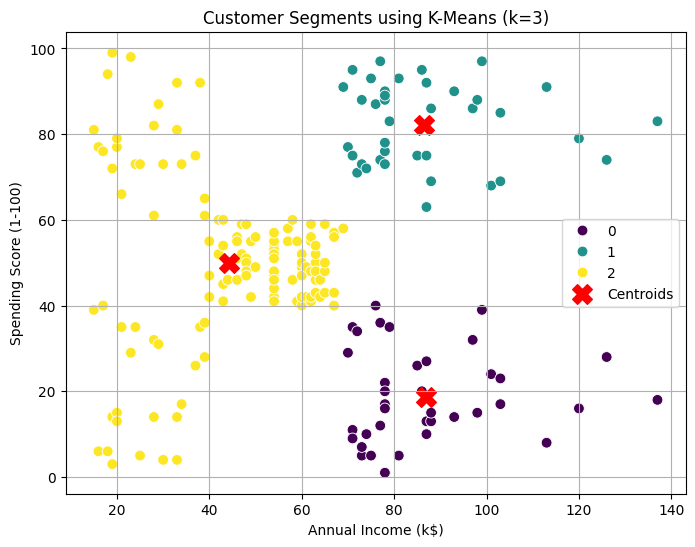

         Annual Income (k$)  Spending Score (1-100)
Cluster                                            
0                      87.0                    18.6
1                      86.5                    82.1
2                      44.2                    49.8


In [23]:
# Define X by selecting the relevant columns from the DataFrame
data = pd.read_csv('customers_dataset.csv')  # Ensure the DataFrame is loaded
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]  # Define X with the features for clustering

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(X_scaled)
centers = scaler.inverse_transform(kmeans.cluster_centers_)

# Plot the scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='viridis', s=60)
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, marker='X', label='Centroids')
plt.title('Customer Segments using K-Means (k=3)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid(True)
plt.show()

# Print cluster centers
print(data.groupby('Cluster')[['Annual Income (k$)', 'Spending Score (1-100)']].mean().round(1))

Cluster 0 : High income, low spenders
Cluster 1 : high income, high spenders
Cluster 2 : medium income, medium spenders

In [ ]:
inertia = []
K_range = range(1, 11)
for k in K_range:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(X_scaled)
    inertia.append(model.inertia_)

plt.figure(figsize=(6, 4))
plt.plot(K_range, inertia, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()
